In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from keras.utils import np_utils
from keras.callbacks import Callback
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import statistics 
from numpy import random
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
# import os, shutil
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
X_train= X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train /=255
X_test /=255


# Check image  after scaling


 [6]


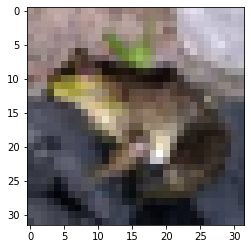


 [3]


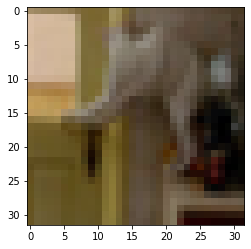


 [7]


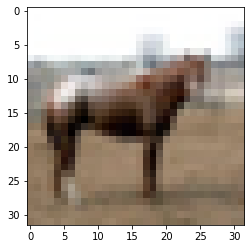


 [9]


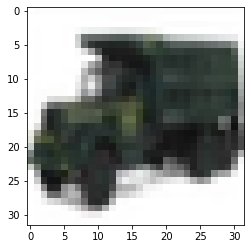


 [3]


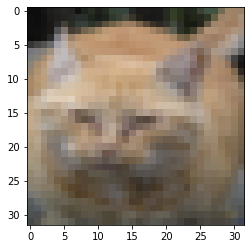


 [0]


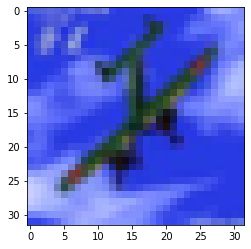


 [0]


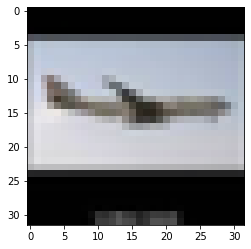


 [0]


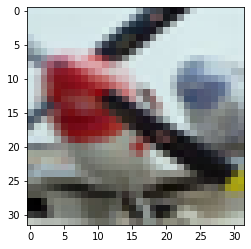


 [8]


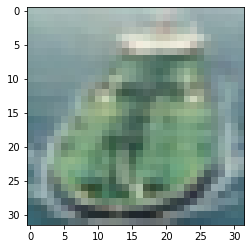


 [4]


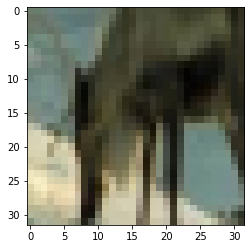

In [ ]:

for i in np.random.randint(0, X_train.shape[0], 10):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
nclasses=10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Shapes

In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

# Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
datagen.fit(X_train)


# Model1

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512,activation='relu'))    
    model.add(Dense(10,activation='softmax'))
    return model

#  Evaluating Model using Data Augmentation

In [ ]:
acc_model1 = []
for i in range(4):
    
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,shuffle=True,random_state=random.randint(100))
    
    model1 = create_model()
    model1.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics =['accuracy'])
    it_train = datagen.flow(X_train, y_train, batch_size=64)
    history1 = model1.fit(it_train, epochs=5, batch_size=64, validation_data=(sub_X_val, sub_y_val),shuffle=True)
    loss, acc = model1.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model1.append(acc)

print("Model1 Accuracy:", statistics.mean(acc_model1))  

Epoch 1/5
782/782 [==============================] - 35s 42ms/step - loss: 2.0308 - accuracy: 0.3582 - val_loss: 2.3042 - val_accuracy: 0.1609
Epoch 2/5
782/782 [==============================] - 32s 41ms/step - loss: 1.4045 - accuracy: 0.4903 - val_loss: 2.2209 - val_accuracy: 0.2789
Epoch 3/5
782/782 [==============================] - 32s 41ms/step - loss: 1.2364 - accuracy: 0.5546 - val_loss: 2.2869 - val_accuracy: 0.3002
Epoch 4/5
782/782 [==============================] - 32s 41ms/step - loss: 1.1324 - accuracy: 0.5975 - val_loss: 2.3777 - val_accuracy: 0.2838
Epoch 5/5
782/782 [==============================] - 32s 41ms/step - loss: 1.0536 - accuracy: 0.6257 - val_loss: 2.1504 - val_accuracy: 0.3532
Epoch 1/5
782/782 [==============================] - 33s 42ms/step - loss: 2.0162 - accuracy: 0.3676 - val_loss: 2.3386 - val_accuracy: 0.1916
Epoch 2/5
782/782 [==============================] - 32s 41ms/step - loss: 1.3916 - accuracy: 0.4961 - val_loss: 2.7762 - val_accuracy: 0.2282

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_3 (Dropout)         (None, 32768)             0         
                                                      

# Model2


In [ ]:

model2 = keras.Sequential(
      [
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'),
          layers.Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Dropout(0.4),
          layers.Flatten(),
          layers.Dense(512, activation="relu"),
          layers.Dense(10, activation='softmax')
      ]
  )


acc_model2 = []
for i in range(4):
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=random.randint(100))
    model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    history_model2 = model2.fit(X_train, y_train , epochs=5, batch_size=64, validation_data=(sub_X_val, sub_y_val))
    loss, acc = model2.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model2.append(acc)
print("Model2 Accuracy:", statistics.mean(acc_model2))


Epoch 1/5
782/782 [==============================] - 11s 14ms/step - loss: 2.5932 - accuracy: 0.1960 - val_loss: 1.9215 - val_accuracy: 0.2746
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 1.7054 - accuracy: 0.3722 - val_loss: 1.5323 - val_accuracy: 0.4547
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 1.4312 - accuracy: 0.4840 - val_loss: 1.2948 - val_accuracy: 0.5371
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 1.2544 - accuracy: 0.5501 - val_loss: 1.0970 - val_accuracy: 0.6192
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 1.1094 - accuracy: 0.6055 - val_loss: 0.9180 - val_accuracy: 0.6836
Epoch 1/5
782/782 [==============================] - 11s 14ms/step - loss: 0.9873 - accuracy: 0.6495 - val_loss: 0.8218 - val_accuracy: 0.7131
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 0.8823 - accuracy: 0.6890 - val_loss: 0.7042 - val_accuracy: 0.7543

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                      

# Model3 


In [ ]:

model3 = keras.Sequential(
      [
          layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          layers.Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'),
          layers.Flatten(),
          layers.Dropout(0.5),
          layers.Dense(512,activation='relu'),
          layers.Dense(256, activation="relu", name="layer1"),
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )


acc_model3 = []
for i in range(5):
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=random.randint(100))
    model3.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
    history_model3 = model3.fit(X_train,y_train, epochs=5, batch_size=64, validation_data=(sub_X_val, sub_y_val))
    loss, acc = model3.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model3.append(acc)
print("Model3 Accuracy:", statistics.mean(acc_model3))


Epoch 1/5
782/782 [==============================] - 10s 12ms/step - loss: 2.0282 - accuracy: 0.3811 - val_loss: 1.4311 - val_accuracy: 0.4968
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 1.2326 - accuracy: 0.5614 - val_loss: 1.1756 - val_accuracy: 0.5699
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 1.0378 - accuracy: 0.6320 - val_loss: 0.9076 - val_accuracy: 0.6791
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 0.9015 - accuracy: 0.6858 - val_loss: 0.8436 - val_accuracy: 0.6977
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.7961 - accuracy: 0.7233 - val_loss: 0.6638 - val_accuracy: 0.7690
Epoch 1/5
782/782 [==============================] - 10s 11ms/step - loss: 0.7300 - accuracy: 0.7484 - val_loss: 0.6336 - val_accuracy: 0.7774
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6620 - accuracy: 0.7752 - val_loss: 0.6708 - val_accuracy: 0.7826
Epoc

In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_6 (Dropout)         (None, 32768)             0         
                                                      

# Model4

In [ ]:

model4 = keras.Sequential(
      [
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Dropout(0.4),
          layers.Flatten(),
          layers.Dense(1024,activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(512,activation='relu'),
          layers.Dense(256, activation="relu"),
          layers.Dense(10, activation='softmax')
      ]
  )


# Architecure 1
acc_model4 = []
for i in range(5):
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=random.randint(100))
    model4.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
    history_model4 = model4.fit(X_train,y_train, epochs=5, batch_size=100, validation_data=(sub_X_val, sub_y_val))
    loss, acc = model4.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model4.append(acc)
print("Model4 Accuracy:", statistics.mean(acc_model4))


Epoch 1/5
500/500 [==============================] - 6s 10ms/step - loss: 1.7675 - accuracy: 0.4043 - val_loss: 1.1673 - val_accuracy: 0.5765
Epoch 2/5
500/500 [==============================] - 5s 9ms/step - loss: 1.1833 - accuracy: 0.5840 - val_loss: 0.9268 - val_accuracy: 0.6845
Epoch 3/5
500/500 [==============================] - 5s 9ms/step - loss: 1.0093 - accuracy: 0.6519 - val_loss: 0.9364 - val_accuracy: 0.7044
Epoch 4/5
500/500 [==============================] - 4s 9ms/step - loss: 0.9142 - accuracy: 0.6843 - val_loss: 0.8008 - val_accuracy: 0.7241
Epoch 5/5
500/500 [==============================] - 4s 9ms/step - loss: 0.8376 - accuracy: 0.7136 - val_loss: 0.6120 - val_accuracy: 0.8014
Epoch 1/5
500/500 [==============================] - 6s 10ms/step - loss: 0.7808 - accuracy: 0.7323 - val_loss: 0.5631 - val_accuracy: 0.8341
Epoch 2/5
500/500 [==============================] - 5s 9ms/step - loss: 0.7156 - accuracy: 0.7567 - val_loss: 0.4813 - val_accuracy: 0.8502
Epoch 3/5
5

In [ ]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 flatten_7 (Flatten)         (None, 8192)             

# Model5

In [ ]:

model5 = keras.Sequential(
      [
          layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(1024,activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(512,activation='relu'),
          layers.Dense(256, activation="relu", name="layer1"),
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )


# Architecure 1
acc_model5 = []
for i in range(5):
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=random.randint(100))
    model5.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
    history_model5 = model5.fit(X_train, y_train, epochs=5, batch_size=70, validation_data=(sub_X_val, sub_y_val))
    loss, acc = model5.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model5.append(acc)
print("Model5 Accuracy:", statistics.mean(acc_model5))  

Epoch 1/5
715/715 [==============================] - 17s 22ms/step - loss: 1.7077 - accuracy: 0.4382 - val_loss: 1.1678 - val_accuracy: 0.5877
Epoch 2/5
715/715 [==============================] - 15s 21ms/step - loss: 1.0201 - accuracy: 0.6513 - val_loss: 0.9161 - val_accuracy: 0.6887
Epoch 3/5
715/715 [==============================] - 15s 21ms/step - loss: 0.7737 - accuracy: 0.7364 - val_loss: 0.5823 - val_accuracy: 0.8115
Epoch 4/5
715/715 [==============================] - 15s 21ms/step - loss: 0.6134 - accuracy: 0.7942 - val_loss: 0.4770 - val_accuracy: 0.8390
Epoch 5/5
715/715 [==============================] - 15s 21ms/step - loss: 0.4968 - accuracy: 0.8361 - val_loss: 0.3508 - val_accuracy: 0.8832
Epoch 1/5
715/715 [==============================] - 17s 22ms/step - loss: 0.4399 - accuracy: 0.8601 - val_loss: 0.3280 - val_accuracy: 0.8987
Epoch 2/5
715/715 [==============================] - 15s 21ms/step - loss: 0.3854 - accuracy: 0.8779 - val_loss: 0.3312 - val_accuracy: 0.8952

In [ ]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                      

# Model6

In [ ]:

model6 = keras.Sequential(
      [
          layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'),
          layers.Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dropout(0.5),
          layers.Dense(256, activation="relu"),
          layers.Dense(10, activation='softmax')
      ]
  )


# Architecure 1
acc_model6 = []
for i in range(2):
    sub_X_train, sub_X_val, sub_y_train, sub_y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=random.randint(100))
    model6.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    history_model6 = model6.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(sub_X_val, sub_y_val))
    loss, acc = model6.evaluate(sub_X_val, sub_y_val, verbose=0)
    acc_model6.append(acc)
print("Model6 Accuracy:", statistics.mean(acc_model6)) 


Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 2.1307 - accuracy: 0.2499 - val_loss: 1.4334 - val_accuracy: 0.4870
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3075 - accuracy: 0.5328 - val_loss: 1.0647 - val_accuracy: 0.6324
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0489 - accuracy: 0.6274 - val_loss: 0.8109 - val_accuracy: 0.7254
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8889 - accuracy: 0.6863 - val_loss: 0.6996 - val_accuracy: 0.7642
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7682 - accuracy: 0.7293 - val_loss: 0.5606 - val_accuracy: 0.8184
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6686 - accuracy: 0.7644 - val_loss: 0.4494 - val_accuracy: 0.8521
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5748 - accuracy: 0.7968 - val_loss: 0.3849 - val_ac

In [ ]:
model6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_10 (Dropout)        (None, 32768)             0         
                                                      

In [ ]:
print("Model1 Accuracy with Data Augmentation:", statistics.mean(acc_model1))
print("Model2 Accuracy:", statistics.mean(acc_model2))
print("Model3 Accuracy:", statistics.mean(acc_model3))
print("Model4 Accuracy:", statistics.mean(acc_model4))
print("Model5 Accuracy:", statistics.mean(acc_model5))
print("Model6 Accuracy:", statistics.mean(acc_model6))

Model1 Accuracy with Data Augmentation: 0.30957499146461487
Model2 Accuracy: 0.8926750123500824
Model3 Accuracy: 0.8220999956130981
Model4 Accuracy: 0.917579996585846
Model5 Accuracy: 0.9044399976730346
Model6 Accuracy: 0.971450001001358


In [ ]:
m4_test_score, m4_test_acc = model4.evaluate(X_test,y_test,verbose=0)

# Model 2
m6_test_score, m6_test_acc = model6.evaluate(X_test,y_test,verbose=0)

# Model 6
m3_test_score, m5_test_acc = model5.evaluate(X_test,y_test,verbose=0)

## **BEST 3 Models**

In [ ]:
print("Model6 Test Accuracy",m6_test_acc)
print("Model4 Test Accuracy",m4_test_acc)
print("Model5 Test Accuracy",m5_test_acc)

Model6 Test Accuracy 0.7075999975204468
Model4 Test Accuracy 0.7457000017166138
Model5 Test Accuracy 0.6238999962806702
